# Channa Dissanyaka
# 215518X

## Step 1: Load and Explore the Dataset

In [1]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

In [2]:
# Load the dataset
data = pd.read_csv('heart.csv')

In [3]:
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


In [5]:
data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.513171
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.500070
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [6]:
data.shape

(1025, 14)

In [7]:
# Check for missing values
print(data.isnull().sum())

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64


## Step 2: Visualization

### Scatterplot Matrix

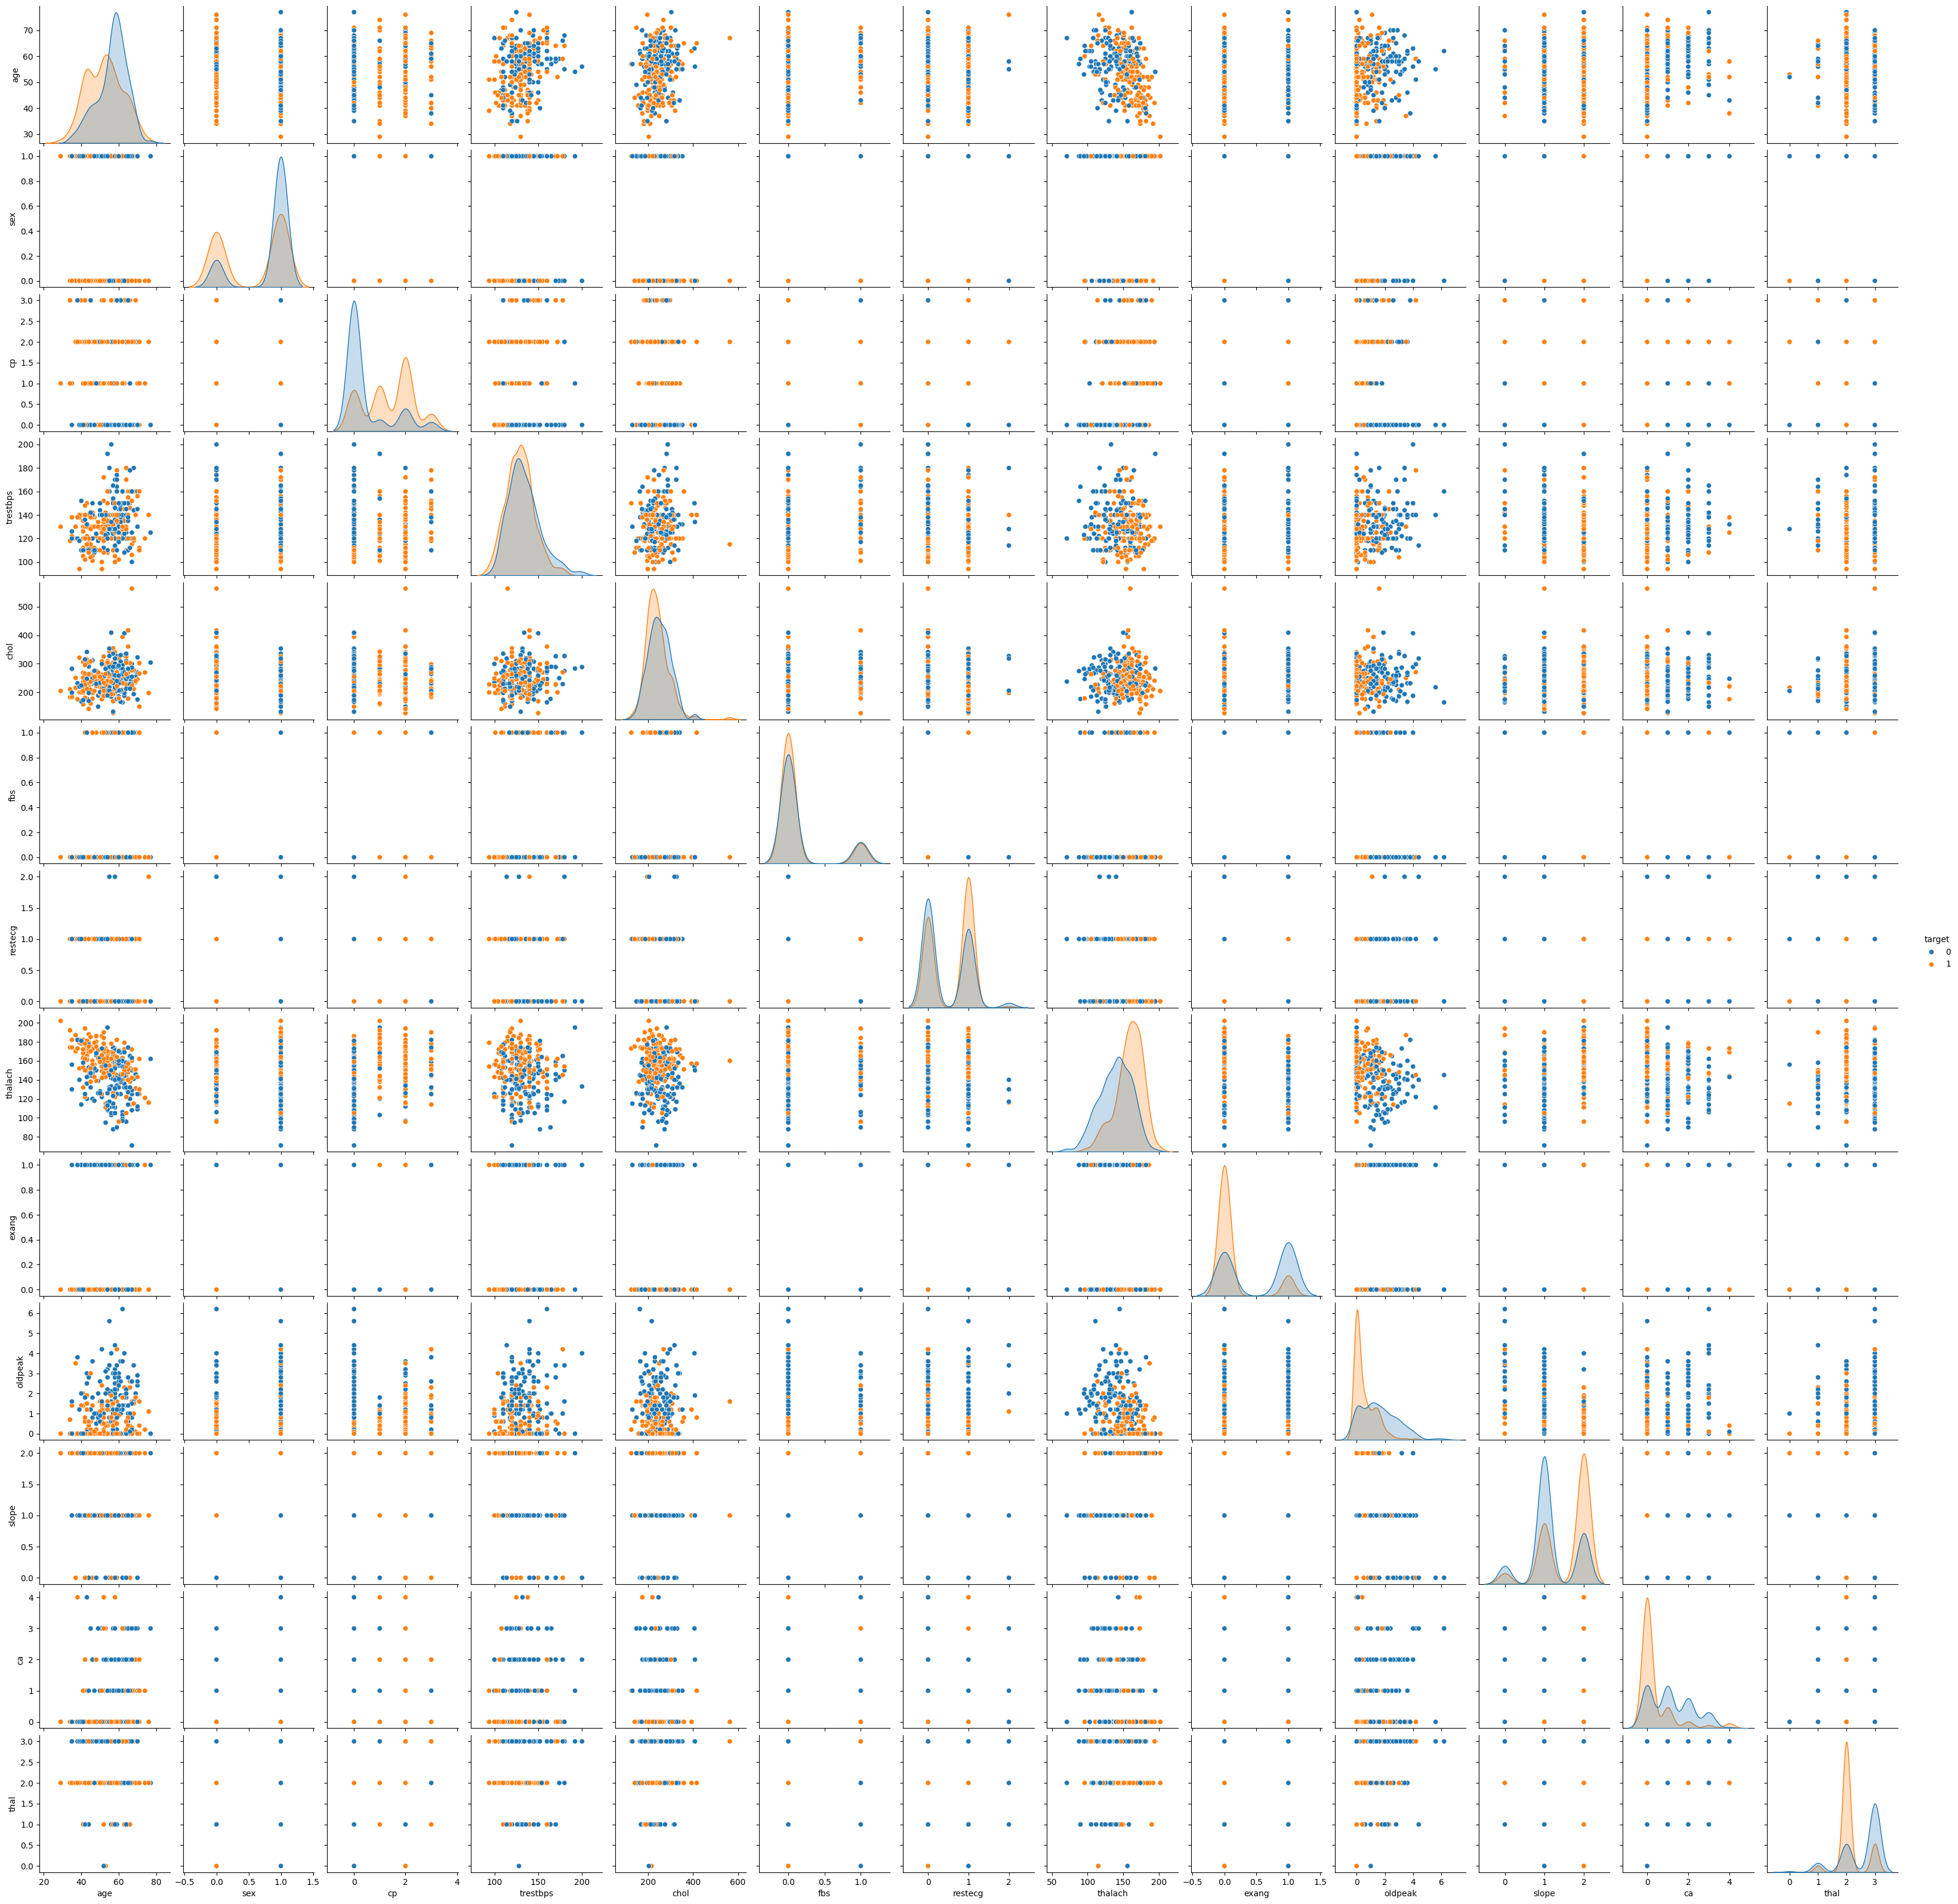

In [11]:
# Create a scatterplot matrix
sns.pairplot(data, hue='target', diag_kind='kde')

# Display the plot
plt.show()

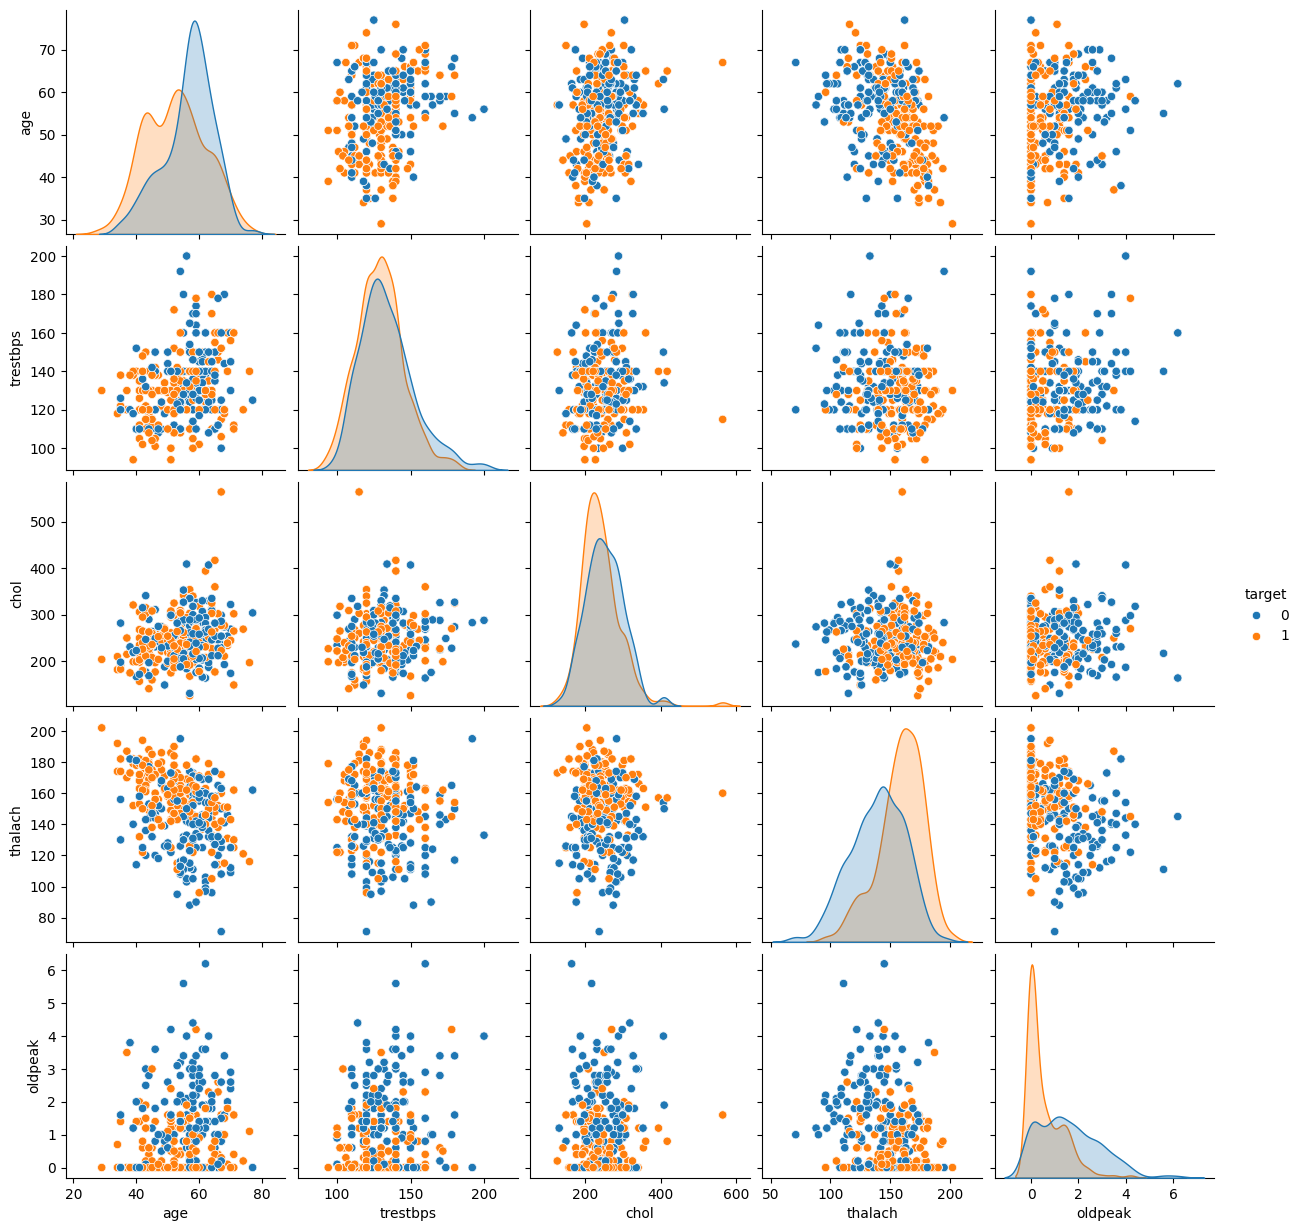

In [ ]:
# Specify the numerical columns and the target
numerical_col = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']

# Assuming your DataFrame is named 'data'
sns.pairplot(data=data[numerical_col + ['target']], hue='target', diag_kind='kde')

# Display the plot
plt.show()


**Interpretation**

People who has high thalach has a tend to be a heart patient.
People who has less oldpeak has a tend to be a heart patient.

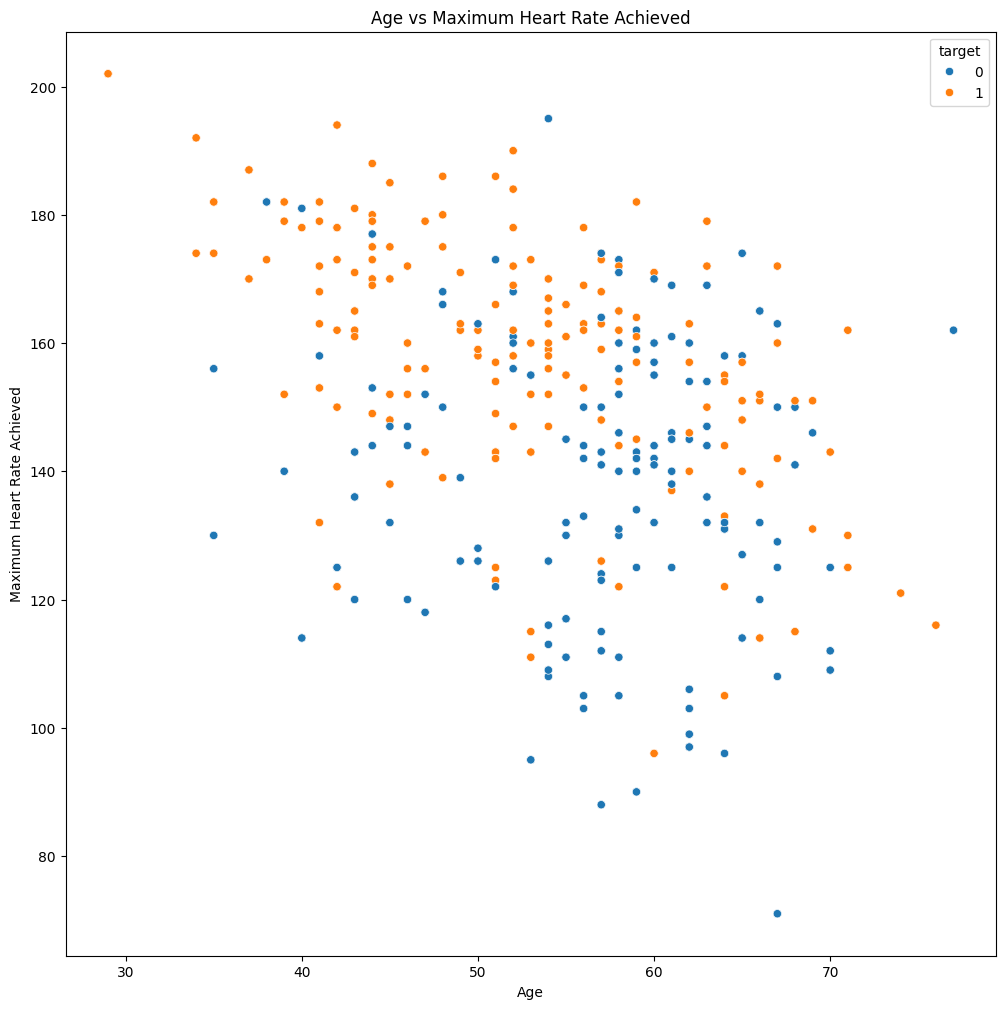

In [16]:
# Scatter plot for age vs maximum heart rate achieved, colored by target
plt.figure(figsize=(12, 12))  
sns.scatterplot(data=data, x='age', y='thalach', hue='target')
plt.title('Age vs Maximum Heart Rate Achieved')
plt.xlabel('Age')
plt.ylabel('Maximum Heart Rate Achieved')
plt.show()


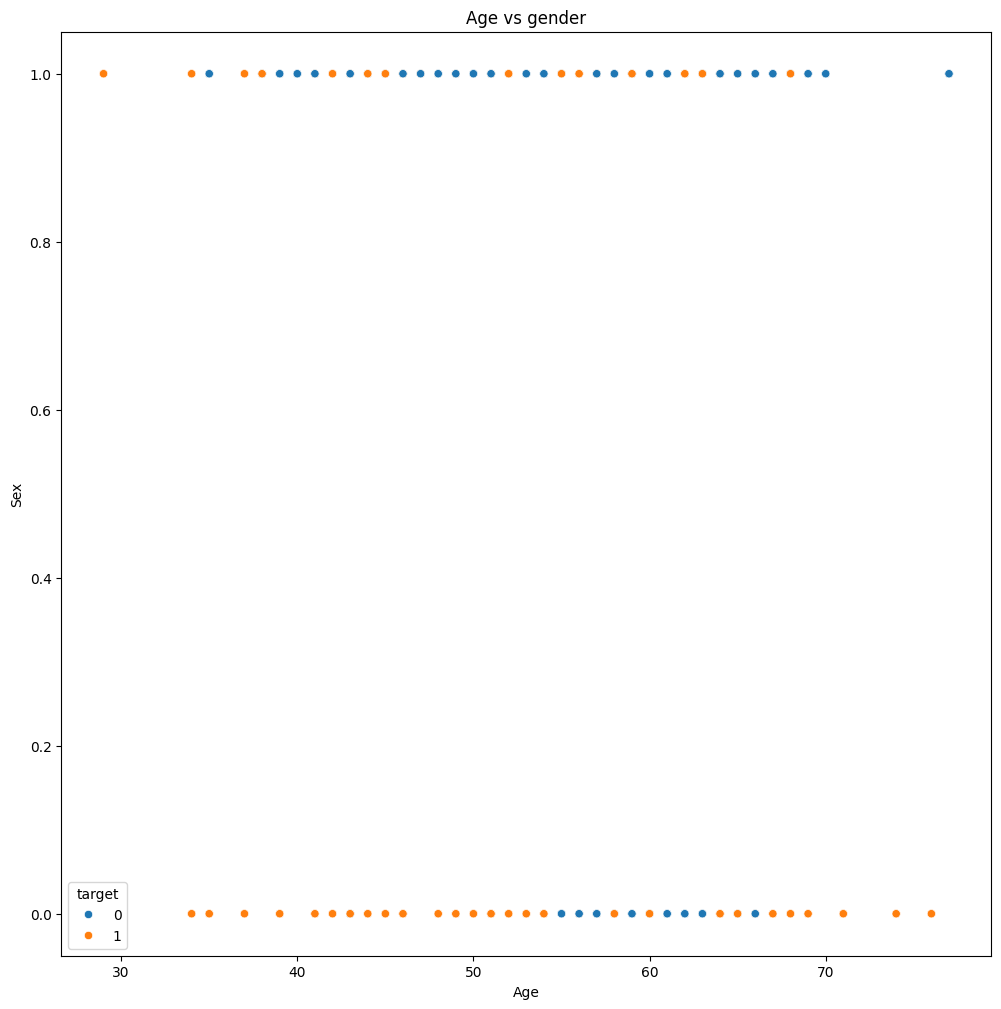

In [17]:
# Scatter plot for age vs maximum heart rate achieved, colored by target
plt.figure(figsize=(12, 12))  
sns.scatterplot(data=data, x='age', y='sex', hue='target')
plt.title('Age vs gender')
plt.xlabel('Age')
plt.ylabel('Sex')
plt.show()


**Interpretation**

Men has more tend to be a heart patient more than females. Specially men in age range 35 to 55.

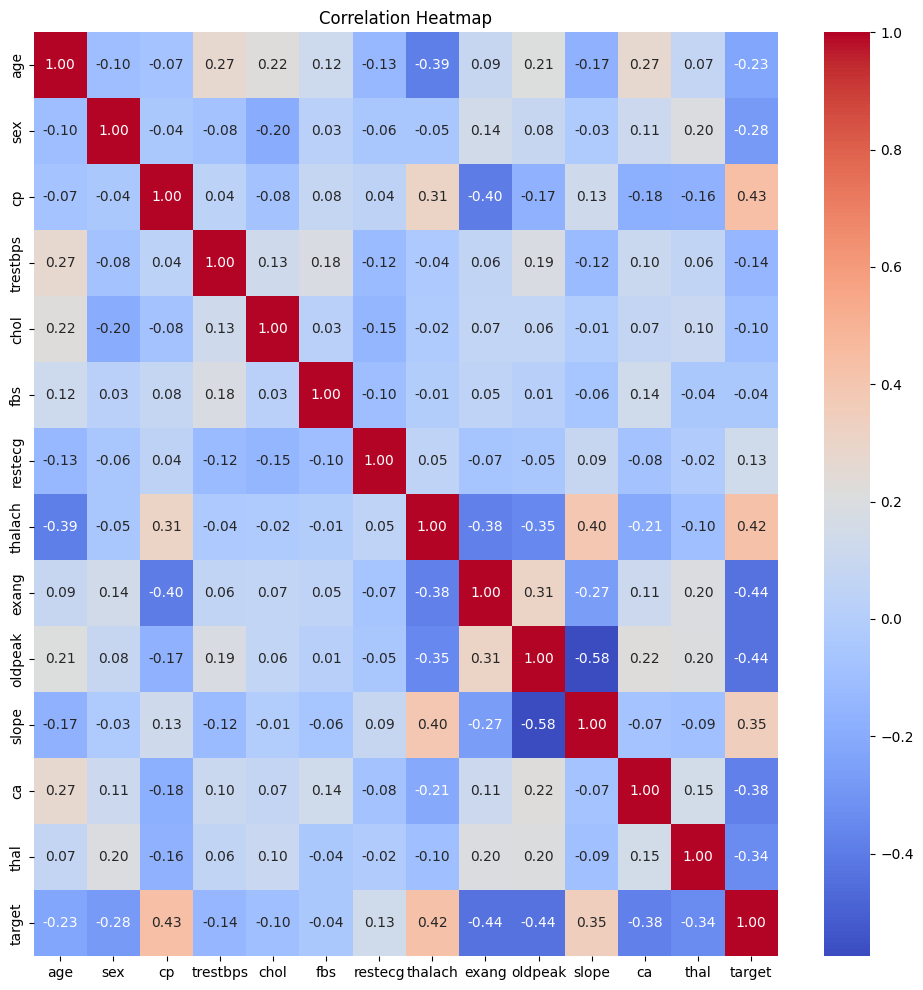

In [47]:
# Correlation heatmap 
plt.figure(figsize=(12, 12))  
corr = data.corr()
sns.heatmap(corr, annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

**Interpretation**

target has weak positive correlation with cp, thalach, slope.

target has weak negative correlation with exang, oldpeak, ca, thal.

target has very weak positive or negative correlation with other features.

oldpeak has moderate negative correlation with slope.


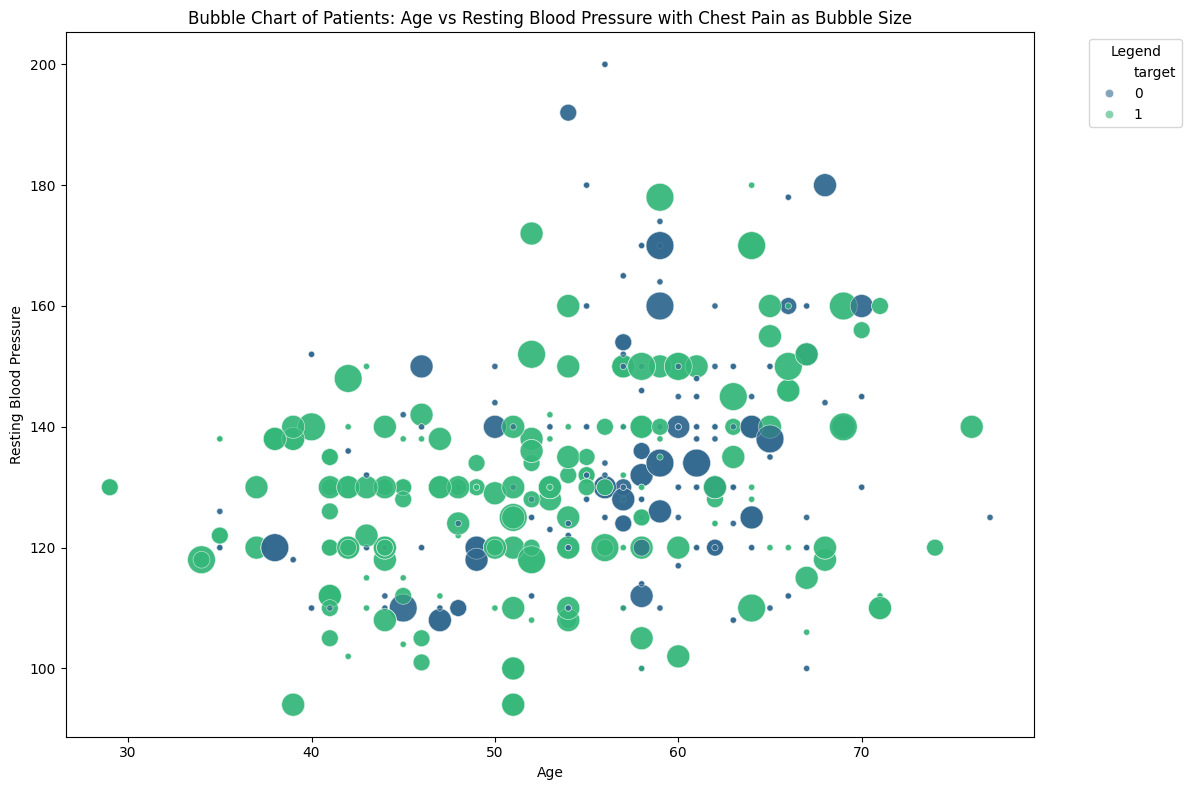

In [48]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create the bubble chart using Seaborn
plt.figure(figsize=(12, 8))
bubble_plot = sns.scatterplot(
    data=data,
    x='age',
    y='trestbps',
    size='cp',            # Bubble size based on chest pain
    hue='target',         # Color by target
    palette='viridis',    # Color palette
    sizes=(20, 400),      # Bubble size range
    alpha=0.6,            # Transparency of bubbles
    edgecolor='w',        # White edge for bubbles
    linewidth=0.5         # Edge linewidth
)

# Add labels and title
plt.xlabel('Age')
plt.ylabel('Resting Blood Pressure')
plt.title('Bubble Chart of Patients: Age vs Resting Blood Pressure with Chest Pain as Bubble Size')

# Move the size legend to avoid overlap
handles, labels = bubble_plot.get_legend_handles_labels()
bubble_plot.legend(
    handles=handles[:len(data['target'].unique())+1],  # Keep hue-related legends
    labels=labels[:len(data['target'].unique())+1],
    title='Legend',
    bbox_to_anchor=(1.05, 1), loc='upper left'
)

# Adjust layout to make room for the legend
plt.tight_layout()

# Show the plot
plt.show()


## Step 3: Data Splitting

In [49]:
from sklearn.model_selection import train_test_split

# Define features and target
X = data.drop(columns='target')  # Features
y = data['target']               # Target variable

# Split the dataset into training and testing sets with stratification
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Check the distribution of target variable in the original, training, and testing sets
print("Original dataset target distribution:")
print(y.value_counts(normalize=True))
print("\nTraining set target distribution:")
print(y_train.value_counts(normalize=True))
print("\nTesting set target distribution:")
print(y_test.value_counts(normalize=True))


Original dataset target distribution:
target
1    0.513171
0    0.486829
Name: proportion, dtype: float64

Training set target distribution:
target
1    0.513415
0    0.486585
Name: proportion, dtype: float64

Testing set target distribution:
target
1    0.512195
0    0.487805
Name: proportion, dtype: float64


## Step 4: Build Classification Models

### Logistic Regression

In [50]:
# Train Logistic Regression model
lr_model = LogisticRegression(max_iter=1000)
lr_model.fit(X_train, y_train)

# Predictions and accuracies
y_train_pred_lr = lr_model.predict(X_train)
y_test_pred_lr = lr_model.predict(X_test)

lr_train_accuracy = accuracy_score(y_train, y_train_pred_lr)
lr_test_accuracy = accuracy_score(y_test, y_test_pred_lr)

print(f'Logistic Regression Training Accuracy: {lr_train_accuracy:.2f}')
print(f'Logistic Regression Testing Accuracy: {lr_test_accuracy:.2f}')

Logistic Regression Training Accuracy: 0.85
Logistic Regression Testing Accuracy: 0.81


### Random Forest

In [51]:
# Initialize Random Forest with custom parameters
rf_model = RandomForestClassifier(
    n_estimators=100,       # Number of trees
    max_depth=5,           # Maximum depth of each tree
    min_samples_split=5,    # Minimum samples required to split a node
    min_samples_leaf=2,     # Minimum samples required at a leaf node
    max_features='sqrt',    # Consider sqrt(number of features) at each split
    bootstrap=True,         # Use bootstrapping
    random_state=42         # Ensure reproducibility
)

# Train the Random Forest model
rf_model.fit(X_train, y_train)

# Predictions and accuracies
y_train_pred_rf = rf_model.predict(X_train)
y_test_pred_rf = rf_model.predict(X_test)

# Calculate accuracy
rf_train_accuracy = accuracy_score(y_train, y_train_pred_rf)
rf_test_accuracy = accuracy_score(y_test, y_test_pred_rf)

# Print accuracies
print(f'Random Forest Training Accuracy: {rf_train_accuracy:.2f}')
print(f'Random Forest Testing Accuracy: {rf_test_accuracy:.2f}')


Random Forest Training Accuracy: 0.95
Random Forest Testing Accuracy: 0.93


1. Logistic Regression:

Training Accuracy (85%): The model performs reasonably well on the training data, suggesting that it has captured the general patterns in the data.

Testing Accuracy (81%): The slight drop in accuracy on the testing data indicates the model generalizes well but may slightly underfit complex patterns in the data.

Interpretation: Logistic Regression, being a linear model, might not fully capture non-linear relationships present in the dataset. Its performance is consistent but limited by its simplicity.

2. Random Forest:

Training Accuracy (95%): The model has a very high accuracy on the training data, indicating it has captured most patterns and relationships within the dataset.

Testing Accuracy (93%): The model performs almost as well on the testing data, demonstrating excellent generalization and capturing non-linear relationships effectively.

Interpretation: The Random Forest model benefits from its ensemble nature, which combines multiple decision trees and handles complex patterns. The minimal drop in testing accuracy suggests the model is not overfitting despite its higher complexity.

## Step 5: Model Performance Analysis

In [52]:
print(f'Absolute Test Accuracy Difference: {abs(lr_test_accuracy - rf_test_accuracy):.2f}')


Absolute Test Accuracy Difference: 0.11


### Conclusion

The absolute test accuracy difference between the Logistic Regression model (81%) and the Random Forest model (93%) is 0.11 (11%). This indicates that the Random Forest model outperforms Logistic Regression in predicting outcomes on unseen data.

The Random Forest model is the better choice for this dataset, providing significantly higher accuracy. While Logistic Regression serves as a reliable and interpretable baseline, Random Forest’s superior performance makes it more suitable for practical applications where accuracy is critical.

## Step 6: Permutation Tests

In [53]:
n_uncorrelated_features = 20
rng = np.random.RandomState(seed=0)
X_rand = rng.normal(size=(X.shape[0], n_uncorrelated_features))

print(X_rand[:5])

[[ 1.76405235  0.40015721  0.97873798  2.2408932   1.86755799 -0.97727788
   0.95008842 -0.15135721 -0.10321885  0.4105985   0.14404357  1.45427351
   0.76103773  0.12167502  0.44386323  0.33367433  1.49407907 -0.20515826
   0.3130677  -0.85409574]
 [-2.55298982  0.6536186   0.8644362  -0.74216502  2.26975462 -1.45436567
   0.04575852 -0.18718385  1.53277921  1.46935877  0.15494743  0.37816252
  -0.88778575 -1.98079647 -0.34791215  0.15634897  1.23029068  1.20237985
  -0.38732682 -0.30230275]
 [-1.04855297 -1.42001794 -1.70627019  1.9507754  -0.50965218 -0.4380743
  -1.25279536  0.77749036 -1.61389785 -0.21274028 -0.89546656  0.3869025
  -0.51080514 -1.18063218 -0.02818223  0.42833187  0.06651722  0.3024719
  -0.63432209 -0.36274117]
 [-0.67246045 -0.35955316 -0.81314628 -1.7262826   0.17742614 -0.40178094
  -1.63019835  0.46278226 -0.90729836  0.0519454   0.72909056  0.12898291
   1.13940068 -1.23482582  0.40234164 -0.68481009 -0.87079715 -0.57884966
  -0.31155253  0.05616534]
 [-1.16

In [54]:
from sklearn.model_selection import StratifiedKFold, permutation_test_score

cv = StratifiedKFold(2, shuffle=True, random_state=0)

# Permutation test on the original data with parallel processing
score_heart, perm_scores_heart, pvalue_heart = permutation_test_score(
    rf_model, X, y, scoring="accuracy", cv=cv, n_permutations=30, n_jobs=-1
)

In [55]:
# Permutation test on the random data
score_rand, perm_scores_rand, pvalue_rand = permutation_test_score(
    rf_model, X_rand, y, scoring="accuracy", cv=cv, n_permutations=30, n_jobs=-1
)

<Figure size 1200x1200 with 0 Axes>

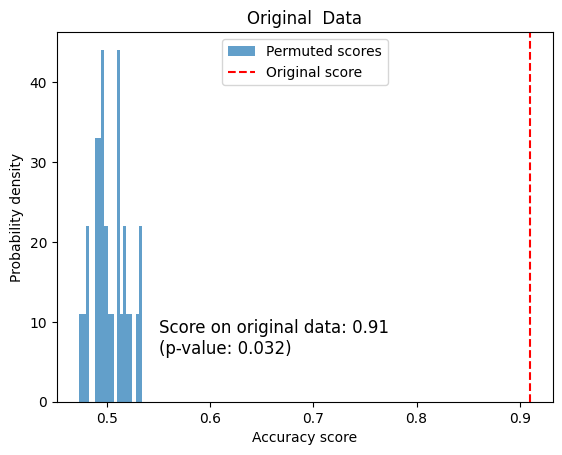

In [65]:
import matplotlib.pyplot as plt 
fig, ax = plt.subplots()
ax.hist(perm_scores_heart, bins=20, density=True, alpha=0.7, label="Permuted scores")
ax.axvline(score_heart, ls="--", color="r", label="Original score")
score_label = f"Score on original data: {score_heart:.2f}\n(p-value: {pvalue_heart:.3f})"
ax.text(0.55, 6, score_label, fontsize=12)
ax.set_xlabel("Accuracy score")
ax.set_ylabel("Probability density")
plt.legend()
plt.title("Original  Data")
plt.show()

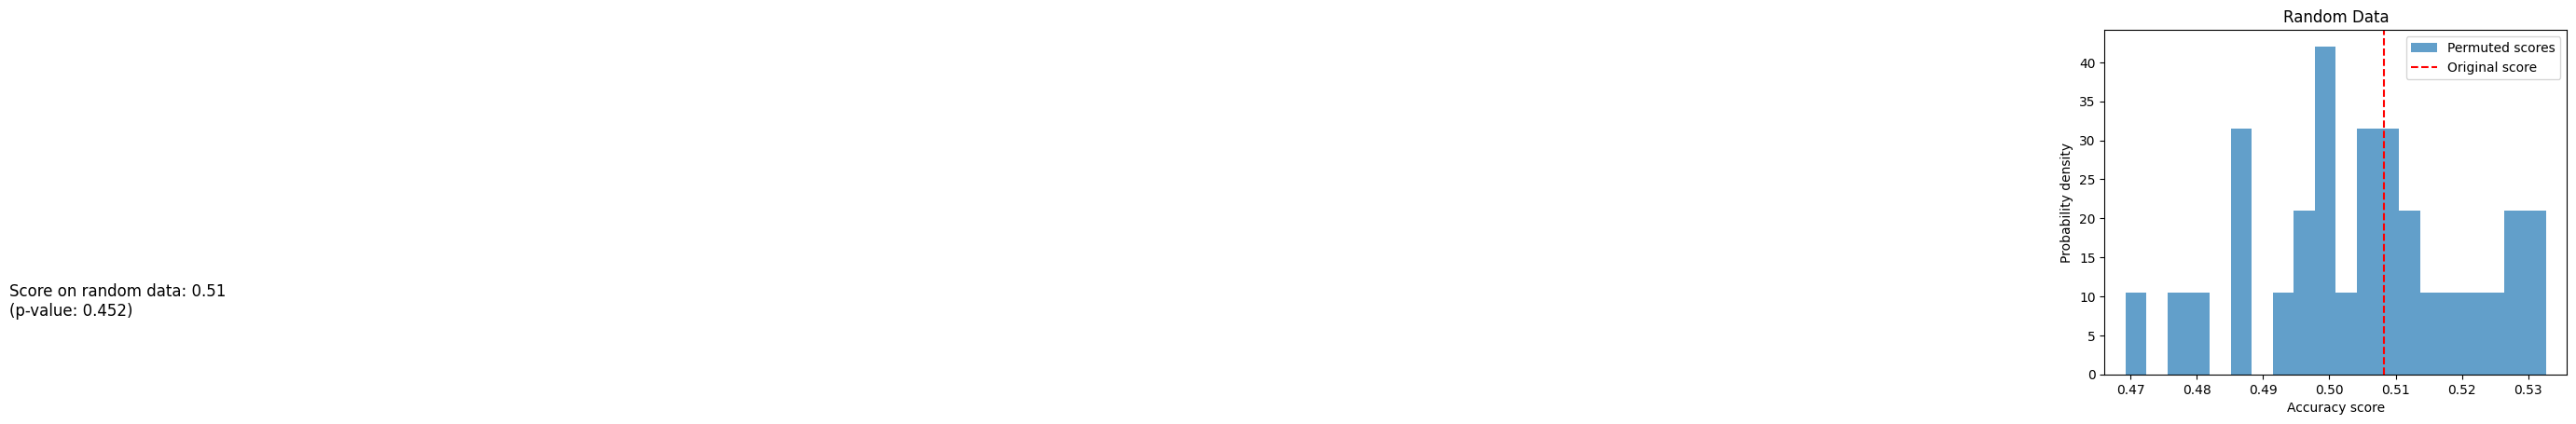

In [64]:
fig, ax = plt.subplots()
ax.hist(perm_scores_rand, bins=20, density=True, alpha=0.7, label="Permuted scores")
ax.axvline(score_rand, ls="--", color="r", label="Original score")
score_label = f"Score on random data: {score_rand:.2f}\n(p-value: {pvalue_rand:.3f})"
ax.text(0.15, 7.5, score_label, fontsize=12)
ax.set_xlabel("Accuracy score")
ax.set_ylabel("Probability density")
plt.legend()
plt.title("Random Data")
plt.show()

Hypothesis to be tested

H
0
 : There is no meaningful relationship between the features and the labels (i.e., the classifier is performing no better than random chance).

H
1
 : There is a meaningful relationship between the features and the labels (i.e., the classifier is performing better than random chance).

lets assume alpha = 0.05
calculated p-value = 0.032

p-value < alpha

Therefore we can reject H0 with 95% of confidence. It means we can assume there is a meaningful relationship between features and the labels.

Conclusion : observed difference between Model A and Model B is statistically significant. Because the model A's (random forest) accuracy is not a random value or achieved it randomly.